In [30]:
import altair as alt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install --upgrade scikit-learn

edu_career_data_unmodified = pd.read_csv('education_career_success.csv')
edu_career_data_unmodified


Note: you may need to restart the kernel to use updated packages.


,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S04996,26,Female,2.44,1258,776,2.44,Arts,3,7,3,8,5,5,31500.0,9,5,Mid,7,No
4996,S04997,18,Female,3.94,1032,923,3.73,Law,0,9,3,6,4,5,41800.0,9,2,Entry,4,No
4997,S04998,19,Female,3.45,1299,720,2.52,Law,3,5,5,6,2,2,49500.0,2,5,Mid,6,No
4998,S04999,19,Male,2.70,1038,319,3.94,Law,1,4,5,5,1,5,54700.0,9,4,Entry,6,No


First clean up data.

In [31]:
edu_career_data = edu_career_data_unmodified.set_index('Student_ID')

def calculate_student_score(high_GPA, sat_score, uni_ranking, uni_GPA, internships, projects, ceritifications, soft_skills, networking):
    max_ranking = edu_career_data['University_Ranking'].max()
    max_internships = edu_career_data['Internships_Completed'].max()
    max_projects = edu_career_data['Projects_Completed'].max()
    max_certifs = edu_career_data['Certifications'].max()
    adjusted_sat = (sat_score / 1600) * 10
    adjusted_uni_ranking = (1 - (uni_ranking / max_ranking)) * 10
    adjusted_high_GPA = (high_GPA / 4) * 10
    adjusted_uni_GPA = (uni_GPA / 4) * 10
    adjusted_internships = (internships / max_internships) * 10
    adjusted_projects = (projects / max_projects) * 10
    adjusted_certifs = (ceritifications / max_certifs) * 10
    return (adjusted_high_GPA * 0.1) + (adjusted_sat * 0.1) + (adjusted_uni_ranking * 0.15) + (adjusted_uni_GPA * 0.15) + (adjusted_internships * 0.2) + (adjusted_projects * 0.1) + (adjusted_certifs * 0.05) + (soft_skills * 0.075) + (networking * 0.075)

def calculate_career_score(job_offers, starting_salary, career_satisfaction, years_to_promotion):
    max_offers = edu_career_data['Job_Offers'].max()
    max_salary = edu_career_data['Starting_Salary'].max()
    max_years = edu_career_data['Years_to_Promotion'].max()
    adjusted_offers = (job_offers / max_offers) * 10
    adjusted_salary = (starting_salary / max_salary) * 10
    adjusted_promotion = (1 - (years_to_promotion / max_years)) * 10
    return (0.25 * adjusted_offers) + (0.4 * adjusted_salary) + (0.1 * career_satisfaction) + (0.25 * adjusted_promotion)


edu_career_data['Student_Score'] = edu_career_data.apply(
    lambda row: calculate_student_score(
        row['High_School_GPA'], 
        row['SAT_Score'], 
        row['University_Ranking'], 
        row['University_GPA'], 
        row['Internships_Completed'], 
        row['Projects_Completed'], 
        row['Certifications'], 
        row['Soft_Skills_Score'], 
        row['Networking_Score']
    ), axis=1)

edu_career_data['Career_Score'] = edu_career_data.apply(
    lambda row: calculate_career_score(
        row['Job_Offers'], 
        row['Starting_Salary'], 
        row['Career_Satisfaction'], 
        row['Years_to_Promotion'], 
    ), axis=1)

edu_career_data



,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,...,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship,Student_Score,Career_Score
Student_ID,,,,,,,,,,,,,,,,,,,,,
S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,...,8,5,27200.0,4,5,Entry,7,No,7.853778,3.977228
S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,...,1,4,25000.0,1,1,Mid,7,No,7.832903,5.090099
S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,...,9,0,42400.0,9,3,Entry,7,No,6.753264,3.579208
S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,...,6,1,57400.0,7,5,Mid,5,No,7.641875,3.473267
S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,...,9,4,47600.0,9,5,Entry,2,No,7.175667,4.785149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S04996,26,Female,2.44,1258,776,2.44,Arts,3,7,3,...,5,5,31500.0,9,5,Mid,7,No,6.200028,4.647525
S04997,18,Female,3.94,1032,923,3.73,Law,0,9,3,...,4,5,41800.0,9,2,Entry,4,No,5.194250,6.555446
S04998,19,Female,3.45,1299,720,2.52,Law,3,5,5,...,2,2,49500.0,2,5,Mid,6,No,6.194931,3.160396


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#field_of_study_data = edu_career_data[edu_career_data['Field_of_Study'] == 'Arts']
field_of_study_data = edu_career_data

column_x = 'Student_Score'
column_y = 'Career_Score'
X = field_of_study_data[[column_x]]
y = field_of_study_data[column_y]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = LinearRegression().fit(X, y)
print("Model:", " + ".join([f"{reg.intercept_:.2f}"] + [f"{coef:.2f}({X.columns[i]})" for i, coef in enumerate(reg.coef_)]))
print("Error:", mean_squared_error(y, reg.predict(X)))

x_range = np.linspace(field_of_study_data[column_x].min(), field_of_study_data[column_x].max(), 100)
regression_df = pd.DataFrame({column_x: x_range})
regression_df[column_y] = reg.predict(regression_df)

scatter_plot = alt.Chart(field_of_study_data).mark_circle(size=20, color='blue').encode(
    x=column_x,
    y=column_y
)

line_plot = alt.Chart(regression_df).mark_line(color='red').encode(
    x=column_x,
    y=column_y
)

scatter_plot + line_plot



Model: 4.73 + 0.01(Student_Score)
Error: 1.5874862050060865


alt.LayerChart(...)

In [35]:
from sklearn.metrics import root_mean_squared_error

def model_parameters(reg, columns):
    """Returns a string with the linear regression model parameters for the given column names."""
    slopes = [f"{coef:.2f}({columns[i]})" for i, coef in enumerate(reg.coef_)]
    return " + ".join([f"{reg.intercept_:.2f}"] + slopes)

edu_career_data_unmodified = edu_career_data_unmodified.set_index('Student_ID')
dummy_data = pd.get_dummies(edu_career_data_unmodified)

X = dummy_data.drop('Starting_Salary', axis=1)
y = dummy_data['Starting_Salary']
reg = LinearRegression().fit(X, y)

print("Model:", model_parameters(reg, X.columns))
# RMSE, or root mean squared error, is the square root of the mean of the squared errors.
print("Error:", root_mean_squared_error(y, reg.predict(X)))

Model: 48684.09 + 50.03(Age) + -218.93(High_School_GPA) + 0.27(SAT_Score) + 1.11(University_Ranking) + 25.51(University_GPA) + 196.49(Internships_Completed) + 68.47(Projects_Completed) + -163.77(Certifications) + 16.21(Soft_Skills_Score) + 11.93(Networking_Score) + -291.77(Job_Offers) + 11.25(Career_Satisfaction) + 65.58(Years_to_Promotion) + 29.73(Work_Life_Balance) + 264.18(Gender_Female) + 345.19(Gender_Male) + -609.37(Gender_Other) + 856.60(Field_of_Study_Arts) + -330.12(Field_of_Study_Business) + 226.62(Field_of_Study_Computer Science) + -166.18(Field_of_Study_Engineering) + -474.28(Field_of_Study_Law) + 208.08(Field_of_Study_Mathematics) + -320.73(Field_of_Study_Medicine) + -74.53(Current_Job_Level_Entry) + -429.73(Current_Job_Level_Executive) + 2.75(Current_Job_Level_Mid) + 501.51(Current_Job_Level_Senior) + -98.99(Entrepreneurship_No) + 98.99(Entrepreneurship_Yes)
Error: 14463.042722413984


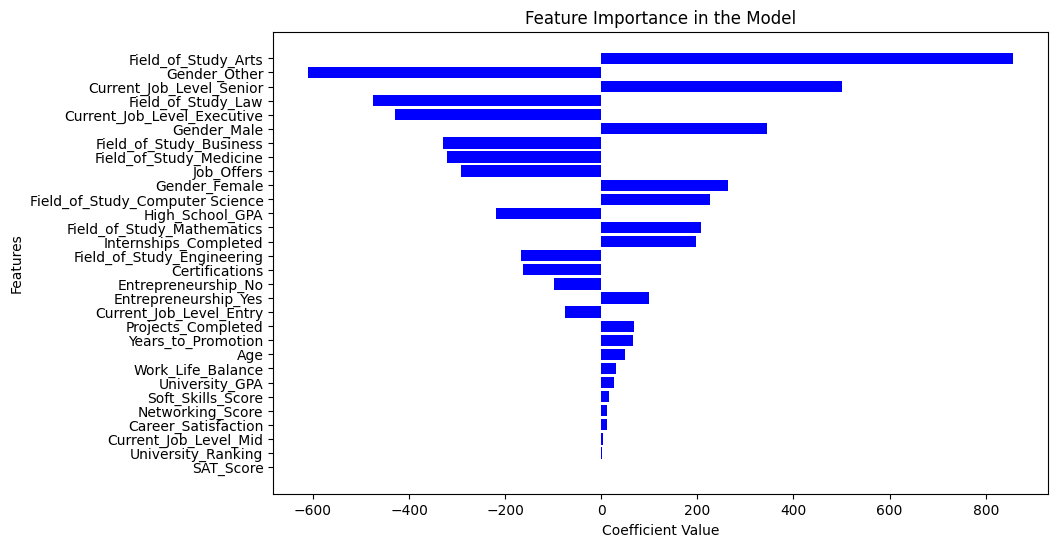

In [38]:
features = X.columns
coefficients = reg.coef_

sorted_idx = np.argsort(np.abs(coefficients))
sorted_features = np.array(features)[sorted_idx]
sorted_coefficients = np.array(coefficients)[sorted_idx]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_coefficients, color='blue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance in the Model')
plt.show()

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

search = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid={"max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10]},
    scoring="neg_root_mean_squared_error",
    verbose=3,
)
search.fit(X_train, y_train)

# Show the best score and best estimator at the end of hyperparameter search
print("Mean score for best model:", search.best_score_)
reg = search.best_estimator_
print("Best model:", reg)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..................max_depth=2;, score=-14433.253 total time=   0.0s
[CV 2/5] END ..................max_depth=2;, score=-14698.938 total time=   0.0s
[CV 3/5] END ..................max_depth=2;, score=-14630.619 total time=   0.0s
[CV 4/5] END ..................max_depth=2;, score=-14305.253 total time=   0.0s
[CV 5/5] END ..................max_depth=2;, score=-14424.621 total time=   0.0s
[CV 1/5] END ..................max_depth=3;, score=-14544.853 total time=   0.0s
[CV 2/5] END ..................max_depth=3;, score=-14693.564 total time=   0.0s
[CV 3/5] END ..................max_depth=3;, score=-14611.152 total time=   0.0s
[CV 4/5] END ..................max_depth=3;, score=-14326.949 total time=   0.0s
[CV 5/5] END ..................max_depth=3;, score=-14499.366 total time=   0.0s
[CV 1/5] END ..................max_depth=4;, score=-14745.311 total time=   0.0s
[CV 2/5] END ..................max_depth=4;, scor